<a href="https://colab.research.google.com/github/lmcanavals/algorithmic_complexity/blob/main/notebooks/ap_dls_no_recursivo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!git clone https://github.com/lmcanavals/algorithmic_complexity.git

Cloning into 'algorithmic_complexity'...
remote: Enumerating objects: 199, done.
remote: Counting objects: 100% (199/199), done.
remote: Compressing objects: 100% (195/195), done.
remote: Total 199 (delta 109), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (199/199), 147.07 KiB | 8.17 MiB/s, done.
Resolving deltas: 100% (109/109), done.


In [3]:
from algorithmic_complexity.aclib import graphstuff as gs
import networkx as nx

In [9]:
def dls(G, s, limit):
  for u in G.nodes:
    G.nodes[u]['visited'] = False
    G.nodes[u]['path']    = -1
    G.nodes[u]['reached'] = False

  G.nodes[s]['reached'] = True
  stack = [(s, limit)]
  while stack:
    u, lim = stack.pop()
    if not G.nodes[u]['visited'] and lim >= 0:
      G.nodes[u]['visited'] = True
      for v in reversed(list(G.neighbors(u))):
        if not G.nodes[v]['visited'] and lim > 0:
          G.nodes[v]['reached']  = True
          G.nodes[v]['path']     = u
          stack.append((v, lim - 1))

  path = [0]*G.number_of_nodes()
  for v, data in G.nodes.data():
    path[v] = data['path']

  return path


In [10]:
%%file 1.adjlist
0 1 2 3
1 2 4
2 3 4
3 5
4 5 6
5 2
6 5

Overwriting 1.adjlist


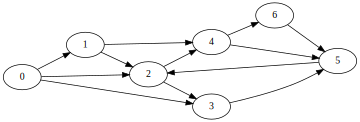

In [11]:
G = nx.read_adjlist('1.adjlist', create_using=nx.DiGraph, nodetype=int)
gs.nx2gv(G)

[-1, 0, 1, 2, 2, -1, -1]


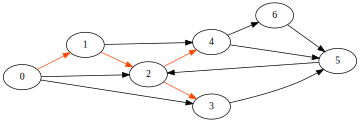

In [12]:
path = dls(G, s=0, limit=3)
print(path)
gs.nx2gv(G, path=path)